In [108]:
# [The SPIN Celebration]
#
# Back to the anniversary of Stern-Gerlach experiment in 1922 beyond future 2022
# 
# reference:https://notebook.community/qutip/qutip-notebooks/examples/stern-gerlach-tutorial
#
%matplotlib inline

from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Qobj, Bloch, basis, ket, tensor

In [109]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0
Numpy Version:      1.23.1
Scipy Version:      1.9.0
Cython Version:     0.29.32
Matplotlib Version: 3.5.2
Python Version:     3.10.5
Number of CPUs:     8
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily 

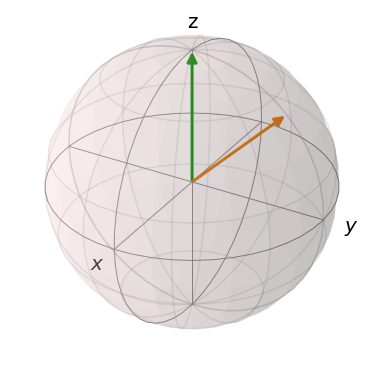

In [110]:
z = np.array([0, 0, 1])
mu = np.array([0, 1, 1]) / np.sqrt(2)

bloch = Bloch()
bloch.zlabel=("z", "")
bloch.add_vectors([z, mu])
bloch.show()

In [111]:
# Simulation of expected results in the classical case

Direction = namedtuple("Direction", ["theta", "phi"])


def random_direction():
    """ Generate a random direction. """
    # See http://mathworld.wolfram.com/SpherePointPicking.html
    r = 0
    while r == 0:
        x, y, z = np.random.normal(0, 1, 3)
        r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return Direction(theta=theta, phi=phi)

In [112]:
def classical_state(d):
    """ Prepare a spin state given a direction. """
    x = np.sin(d.theta) * np.cos(d.phi) 
    y = np.sin(d.theta) * np.sin(d.phi)
    z = np.cos(d.theta)
    return np.array([x, y, z])

In [113]:
classical_up = np.array([0, 0, 1])

def classical_spin(c):
    """ Measure the z-component of the spin. """
    return classical_up.dot(c)

In [114]:
def classical_stern_gerlach(n):
    """ Simulate the Stern-Gerlach experiment """
    directions = [random_direction() for _ in range(n)]
    atoms = [classical_state(d) for d in directions]
    spins = [classical_spin(c) for c in atoms]
    return atoms, spins

In [115]:
def plot_classical_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Classical Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#ff{:x}0ff".format(i, i) for i in range(10)]
    b.zlabel = ["$z$", ""]
    b.add_vectors(atoms)
    #b.render(fig=fig, axes=ax1)
    b.render()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

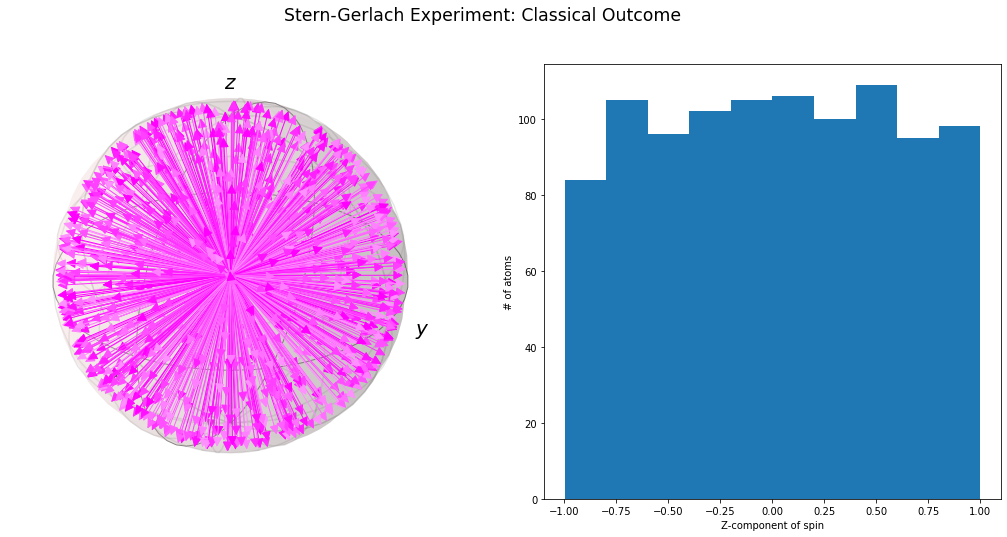

In [116]:
atoms, spins = classical_stern_gerlach(1000)
plot_classical_results(atoms, spins)

In [117]:
def plot_real_vs_actual(spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Real vs Actual", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    ax1.hist([np.random.choice([1, -1]) for _ in spins])
    ax1.set_xlabel("Z-component of spin")
    ax1.set_ylabel("# of atoms")
    
    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

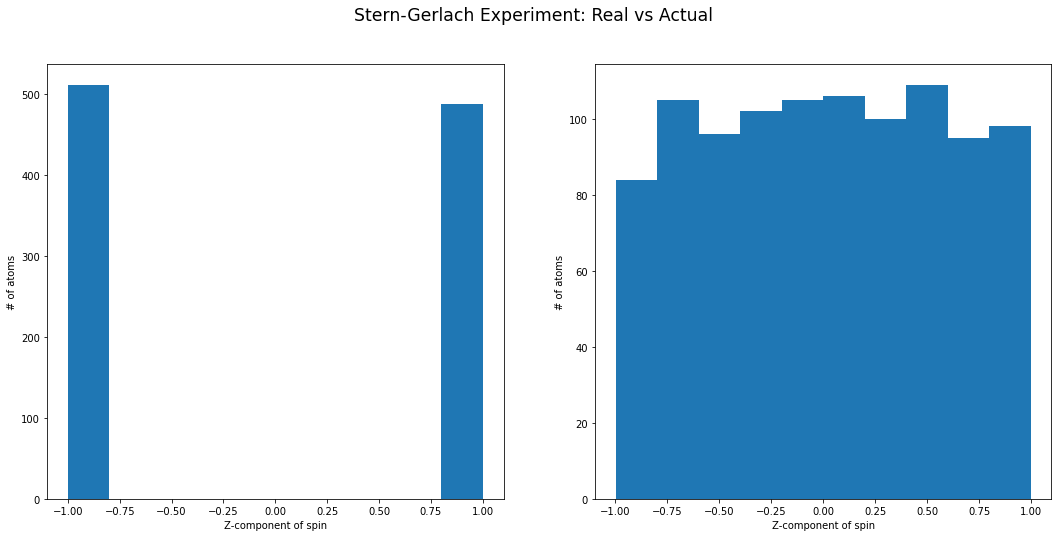

In [118]:
plot_real_vs_actual(spins)

In [119]:
class ClassicalBit:
    def __init__(self, outcome):
        self.outcome = outcome
            
b0 = heads = ClassicalBit(outcome=0)
b1 = tails = ClassicalBit(outcome=1)

def measure_cbit(cbit):
    return cbit.outcome

print("State:\n", b0)
print("Outcome:", measure_cbit(b0))

State:
Outcome: 0


In [120]:
b0 = ket("0")  # |0>
b1 = ket("1")  # |1>

print("State:\n", b1)

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [121]:
def measure_qbit(qbit):
    if qbit == ket("0"):
        return 0
    if qbit == ket("1"):
        return 1
    raise NotImplementedError("No clue yet. :)")
    
print("Outcome:", measure_qbit(b1))

Outcome: 1


In [122]:
def plot_real_a_b():
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Probabilities: Real $a$ and $b$", fontsize="xx-large")

    ax = plt.subplot(1, 1, 1)

    ax.plot([0, 1], [1, 0])
    ax.set_xlabel("$a$")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylabel("$b$")
    ax.set_ylim(-0.5, 1.5)

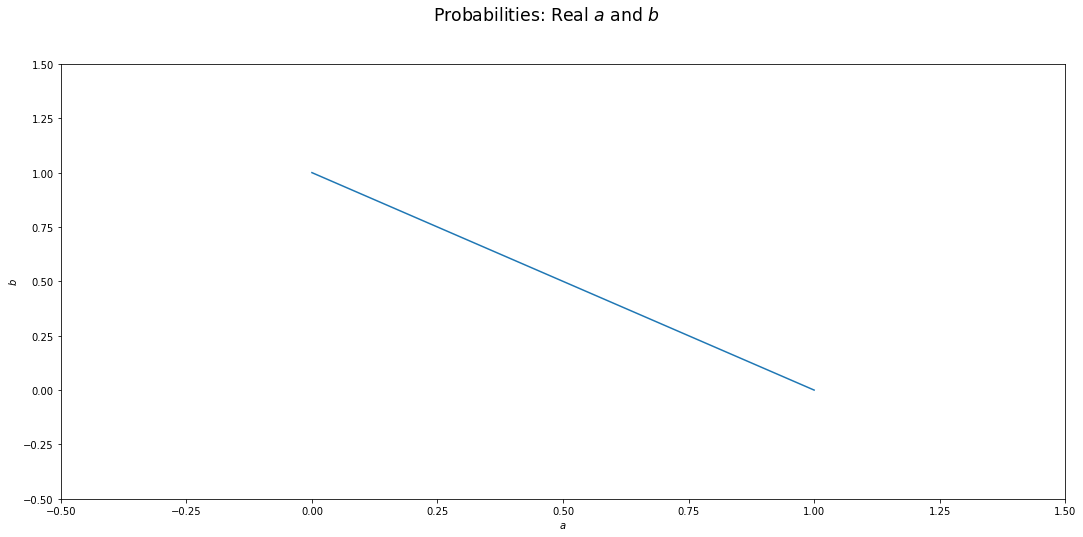

In [123]:
plot_real_a_b()

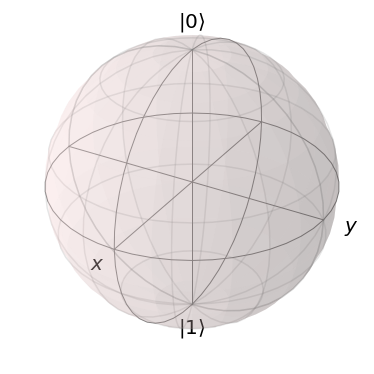

In [124]:
b = Bloch()
b.show()

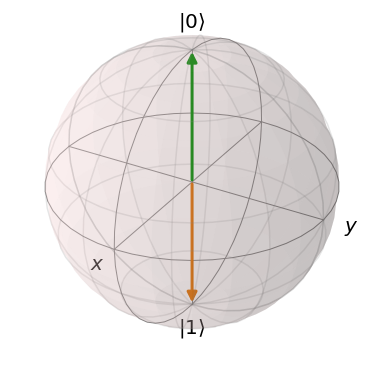

In [125]:
b = Bloch()
up = ket("0")
down = ket("1")
b.add_states([up, down])
b.show()

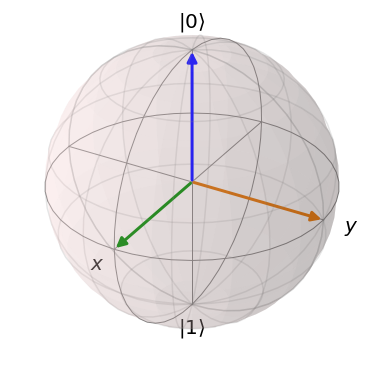

In [126]:
x = (up + down).unit()
y = (up + (0 + 1j) * down).unit()
z = up
b = Bloch()
b.add_states([x, y, z])
b.show()

In [127]:
def plot_bloch(fig, ax, title, states, color_template):
    """ Plot some states on the bloch sphere. """
    b = Bloch(fig=fig, axes=ax)
    ax.set_title(title, y=-0.01)
    b.vector_width = 1
    b.vector_color = [color_template.format(i * 10) for i in range(len(states))]
    b.add_states(states)
    #b.render(fig=fig, axes=ax)
    b.render()

In [128]:
def plot_multi_blochs(plots):
    """ Plot multiple sets of states on bloch spheres. """
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Bloch Sphere", fontsize="xx-large")
    n = len(plots)
    axes = [plt.subplot(1, n, i + 1, projection='3d') for i in range(n)]
    for i, (title, states, color_template) in enumerate(plots):
        plot_bloch(fig, axes[i], title, states, color_template)

In [129]:
up = ket("0")
down = ket("1")

# magnitude_circle = [Qobj([[a], [np.sqrt(1 - a**2)]]) for a in np.linspace(0, 1, 20)]
magnitude_circle = [
    (a * up + np.sqrt(1 - a**2) * down)
    for a in np.linspace(0, 1, 20)
]
# angular_circle = [Qobj([[np.sqrt(0.5)], [np.sqrt(0.5) * np.e ** (1j * theta)]]) for theta in np.linspace(0, np.pi, 20)]
angular_circle = [
    (np.sqrt(0.5) * up + np.sqrt(0.5) * down * np.e ** (1j * theta))
    for theta in np.linspace(0, np.pi, 20)
]

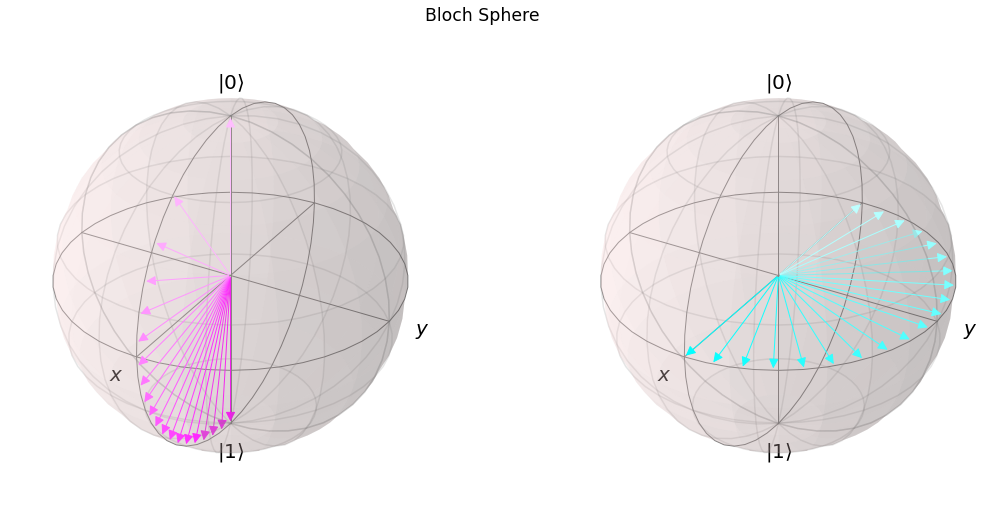

In [130]:
plot_multi_blochs([
    ["Changing relative magnitude", magnitude_circle, "#ff{:02x}ff"],
    ["Changing relative angle", angular_circle, "#{:02x}ffff"],
])

In [131]:
def measure_qbit(qbit):
    a = qbit.full()[0][0]  # a
    b = qbit.full()[1][0]  # b
    if np.random.random() <= np.abs(a) ** 2:
        return 0
    else:
        return 1

In [132]:
# |a|**2 + |b|**2 == 1

a = (1 + 0j) / np.sqrt(2)
b = (0 + 1j) / np.sqrt(2)
qbit = a * ket("0") + b * ket("1")
    
print("State:\n", qbit)
print("Outcome:", measure_qbit(qbit))

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Outcome: 0


In [133]:
qbit = (1 * ket("0")) + (1j * ket("1"))
qbit = qbit.unit()

print("State:\n", qbit)
print("Outcome:", measure_qbit(qbit))

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Outcome: 1


In [134]:
def component(qbit, direction):
    component_op = direction.dag()
    a = component_op * qbit
    return a[0][0]

def measure_qbit(qbit, direction):
    a = component(qbit, direction)
    if np.random.random() <= np.abs(a) ** 2:
        return 0
    else:
        return 1

In [135]:
up, down = ket("0"), ket("1")
x, y, z = (up + down).unit(), (up + (0 + 1j) * down).unit(), up

print("State:\n", x)
print("Outcomes:", [measure_qbit(x, direction=up) for _ in range(10)])

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Outcomes: [1, 1, 1, 0, 0, 0, 1, 1, 0, 1]


In [136]:
def quantum_state(d):
    """ Prepare a spin state given a direction. """
    return np.cos(d.theta / 2) * up + np.exp(1j * d.phi) * np.sin(d.theta / 2) * down

In [137]:
up = ket('0')

def quantum_spin(q):
    """ Measurement the z-component of the spin. """
    a_up = (up.dag() * q).tr()
    prob_up = np.abs(a_up) ** 2
    return 1 if np.random.uniform(0, 1) <= prob_up else -1

In [138]:
def quantum_stern_gerlach(n):
    """ Simulate the Stern-Gerlach experiment """
    directions = [random_direction() for _ in range(n)]
    atoms = [quantum_state(d) for d in directions]
    spins = [quantum_spin(q) for q in atoms]
    return atoms, spins

In [139]:
def plot_quantum_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Quantum Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#{:x}0{:x}0ff".format(i, i) for i in range(10)]
    b.add_states(atoms)
    #b.render(fig=fig, axes=ax1)
    b.render()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

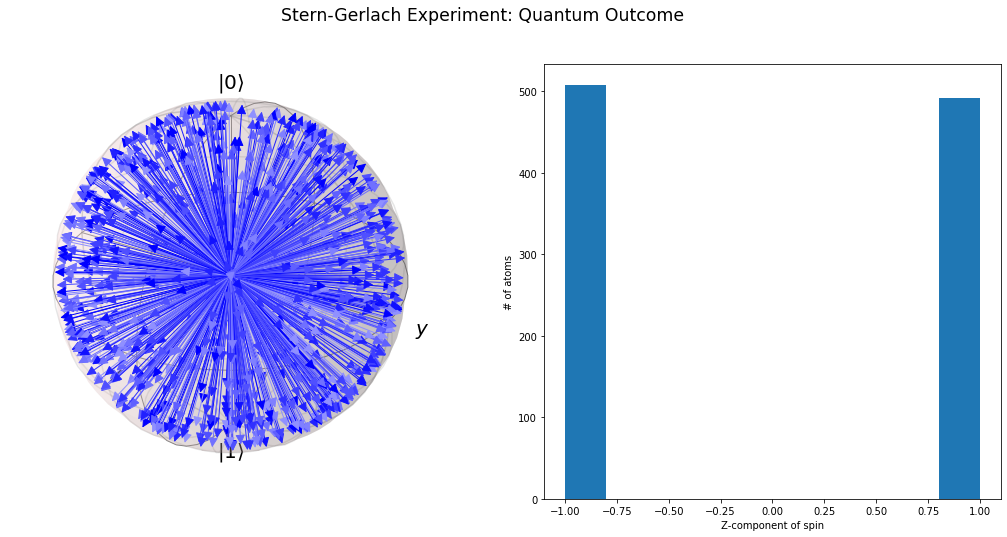

In [140]:
atoms, spins = quantum_stern_gerlach(1000)
plot_quantum_results(atoms, spins)


In [141]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.4.0
ipykernel        : 6.15.1
ipywidgets       : 7.7.1
jupyter_client   : 7.3.4
jupyter_core     : 4.11.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.6.6
nbconvert        : 6.5.0
nbformat         : 5.4.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.3.0
